In [192]:
from sklearn import preprocessing

from dataset import *
from base_model import *
from neural_net import *
from sampled_net import *
from visualisator import *
from logic import *
import dataset
import base_model
import neural_net
import sampled_net
import visualisator
import logic

import importlib
importlib.reload(dataset)
importlib.reload(base_model)
importlib.reload(neural_net)
importlib.reload(sampled_net)
importlib.reload(visualisator)
importlib.reload(logic)



<module 'logic' from 'c:\\Users\\daydo\\OneDrive\\Dokumente\\banew\\logic.py'>

In [193]:
xd = 4  # Input space dimensions
yd = 4  # Output dimension
num_samples = 1000  # Number of data points
epochs = 100  # Number of training epochs
l = [200]  # Number of neurons in each layer


dataset = Dataset()
dataset.create_dataset_Barron(xd, num_samples)
dataset.scale(preprocessing.MinMaxScaler())
dataset.split_train_test(0.2)

In [194]:
model_nn = NeuralNet()
model_nn.fit(dataset.X_train, dataset.y_train, l, validation_split=0.2, epochs=epochs)


In [197]:
model_sampled = SampledNet()
alpha, radius = model_sampled.fit(dataset.X_train, dataset.y_train, model_nn, layer2="ridge", radius=-1, alpha=-1)

y_nn = model_nn.predict(dataset.X_test)
y_sampled = model_sampled.predict(dataset.X_test)

print(f"loss y_nn and y_test      \t{sklearn.metrics.mean_squared_error(y_nn, dataset.y_test)}")
print(f"loss y_sampled and y_test \t{sklearn.metrics.mean_squared_error(y_sampled, dataset.y_test)}")



radius: 0.000


  0%|          | 0/200 [00:00<?, ?it/s]

100%|██████████| 200/200 [00:00<00:00, 3871.11it/s]


alpha 	loss
0.0001 	1.806e-02
0.001 	1.386e-02
0.01 	1.360e-02
0.1 	1.368e-02
1 	1.370e-02
10 	1.378e-02
100 	1.523e-02

radius: 0.204


100%|██████████| 200/200 [00:00<00:00, 1990.18it/s]

alpha 	loss
0.0001 	2.459e-02
0.001 	1.107e-02
0.01 	1.082e-02


0.1 	1.143e-02
1 	1.263e-02
10 	1.339e-02
100 	1.387e-02

radius: 0.408


100%|██████████| 200/200 [00:00<00:00, 376.92it/s]


alpha 	loss
0.0001 	6.026e-03
0.001 	5.301e-03
0.01 	4.852e-03
0.1 	5.656e-03
1 	8.579e-03
10 	1.121e-02
100 	1.289e-02

radius: 0.612


100%|██████████| 200/200 [00:01<00:00, 116.25it/s]


alpha 	loss
0.0001 	1.901e-03
0.001 	1.530e-03
0.01 	1.254e-03
0.1 	1.832e-03
1 	3.722e-03
10 	7.340e-03
100 	1.047e-02

radius: 0.817


100%|██████████| 200/200 [00:04<00:00, 47.93it/s]


alpha 	loss
0.0001 	1.389e-03
0.001 	1.070e-03
0.01 	9.567e-04
0.1 	1.367e-03
1 	2.893e-03
10 	6.527e-03
100 	1.014e-02

radius: 1.021


100%|██████████| 200/200 [00:07<00:00, 27.26it/s]


alpha 	loss
0.0001 	9.969e-04
0.001 	9.682e-04
0.01 	9.627e-04
0.1 	1.282e-03
1 	2.532e-03
10 	6.349e-03
100 	1.022e-02

radius: 1.225


100%|██████████| 200/200 [00:10<00:00, 18.57it/s]


alpha 	loss
0.0001 	8.916e-04
0.001 	8.790e-04
0.01 	9.484e-04
0.1 	1.331e-03
1 	2.655e-03
10 	6.250e-03
100 	1.028e-02

radius: 1.429


100%|██████████| 200/200 [00:12<00:00, 15.78it/s]


alpha 	loss
0.0001 	8.555e-04
0.001 	8.588e-04
0.01 	9.282e-04
0.1 	1.297e-03
1 	2.602e-03
10 	6.182e-03
100 	1.031e-02

radius: 1.633


100%|██████████| 200/200 [00:12<00:00, 15.63it/s]


alpha 	loss
0.0001 	8.555e-04
0.001 	8.588e-04
0.01 	9.282e-04
0.1 	1.297e-03
1 	2.602e-03
10 	6.182e-03
100 	1.031e-02

radius: 1.837


100%|██████████| 200/200 [00:11<00:00, 16.78it/s]

alpha 	loss
0.0001 	8.555e-04
0.001 	8.588e-04
0.01 	9.282e-04
0.1 	1.297e-03
1 	2.602e-03
10 	6.182e-03
100 	1.031e-02
loss y_nn and y_test      	0.005426243549918735
loss y_sampled and y_test 	0.0009471427463736428


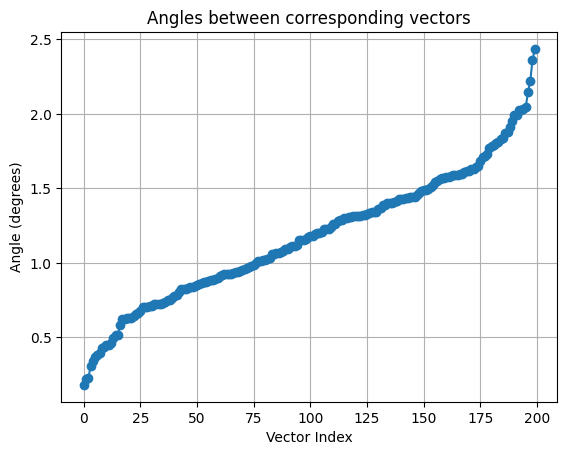

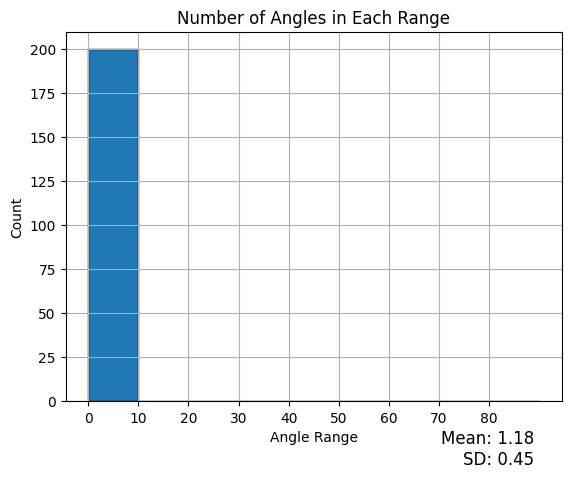

TypeError: 'Axes' object is not subscriptable

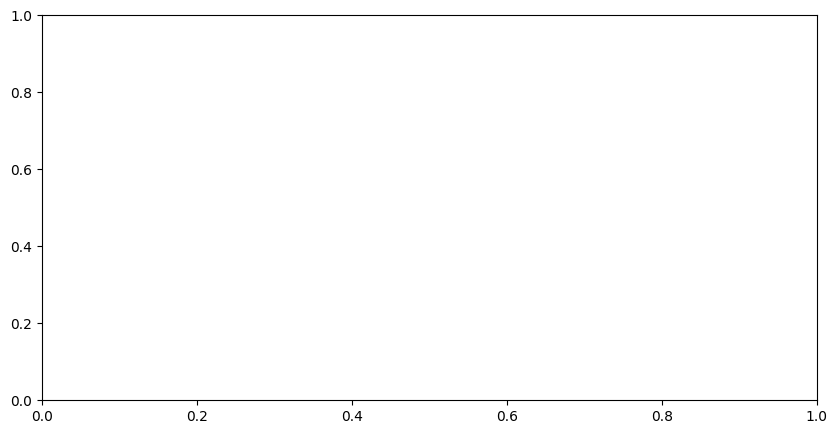

In [207]:
plot_vector_differences(np.transpose(model_nn.weights[0]), np.transpose(model_sampled.weights[0]))
visualize_data(dataset.y_test, y_sampled)


In [ ]:
mses = loss_f_alpha_radius_mse(dataset, model_nn)
plot_loss_f_alpha_radius_mse(mses)